In [1]:
'''Load dataset - check null value - check info - split into X and Y - Sampling technique to 
balance dataset - logistic regression - Decision tree - pruning technique - random forest 
- stacking - Adaboost - Gradient boost - xgb - knn - Naive bayes'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the dataset of credit card
df=pd.read_csv('Creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#check data column and rows
df.shape

(284807, 31)

In [4]:
#check null value of all columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

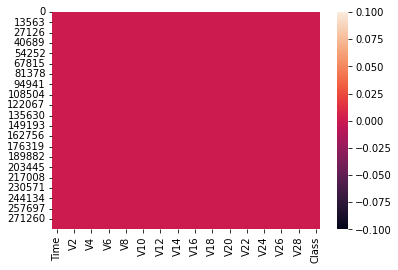

In [5]:
#use heatmap to check null value
sns.heatmap(df.isnull())
plt.show()

In [6]:
#check dataset all information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#select input data x and output data y
x = df.drop("Class",axis=1)
y = df["Class"]

In [8]:
#split data in x and y
from sklearn.model_selection import train_test_split


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [10]:
#check x_train 70% input data
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
191125,129124.0,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,...,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199,14.37
153710,99901.0,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,...,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814,9.00
261216,159917.0,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,...,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179,1.98
190724,128961.0,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,...,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441,4.60
127492,78349.0,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,...,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114,46.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,31666.0,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26
117583,74729.0,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32
73349,55095.0,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58
267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80


In [11]:
#our dataset is not balanced
#so we use sampling technique to balance dataset
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
#pip install imblearn
#First time install imblearn package
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [13]:
#create object of random over sampler
ros = RandomOverSampler()

In [14]:
#fit _resample() inbuilt method of RandomOversamle() class
x_train1,y_train1=ros.fit_resample(x_train,y_train)

In [15]:
y_train1.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [16]:
#balance testing data
x_test1,y_test1=ros.fit_resample(x_test,y_test)

In [17]:
y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [18]:
#--now balanced data we store in new x_train1,y_train1
#--x_test1,y_test1
#here our dataset is balanced.....so we apply logistic algo
#Create a baseline model(Logistic Regression)
from sklearn.linear_model import LogisticRegression
#similar to LinearRegression

In [19]:
#create object of logistic regression
lr = LogisticRegression()

In [20]:
#train model sucessfully....!
lr.fit(x_train1,y_train1)

LogisticRegression()

In [21]:
#Test the model , use predict() inbuilt method of Logistic Regression
#predict() : Y_pred=1/(1+exp(-X))
y_pred=lr.predict(x_test1)

In [22]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [23]:
y_test1.shape

(170616,)

In [24]:
#we compare the value of y_test1 and y_pred(machine output)
d={'Actual Output':y_test1,'Predicted Output':y_pred}
new_df=pd.DataFrame(d)
new_df.head(10)

,Actual Output,Predicted Output
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [25]:
#findout score , it is also known as accuracy-score 
#score() inbuilt method of Logistic Regression 
lr.score(x_test1,y_test1)

0.9298014254231725

In [26]:
#Score is very good .
#Accuracy score is always good. Most of the time, it is very good . 
#means we should not depend only accuracy score  .
#we also check recall ,precision ,f1-score 

In [27]:
#Evaluation Matrics : - 
#learn a confusion matrix 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [28]:
accuracy_score(y_test1,y_pred) #similar to score() of logistic regression

0.9298014254231725

In [29]:
recall_score(y_test1,y_pred) 

0.8886153701880246

In [30]:
precision_score(y_test1,y_pred)

0.9683831325609024

In [31]:
f1_score(y_test1,y_pred)

0.9267860308455949

In [32]:
#classification_report() inbuilt function which define in
#classification_report class
from sklearn.metrics import classification_report 

In [33]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616



In [34]:
#confusion matrix 
from sklearn.metrics import confusion_matrix

In [35]:
print(confusion_matrix(y_test1,y_pred))

[[82833  2475]
 [ 9502 75806]]


In [36]:
##Now we use 2nd algorithm Decision Tree
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.shape

(284807, 31)

In [38]:
x1=df.drop("Class",axis=1)
y1=df['Class']

In [39]:
#split the data in x and y
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=1)


In [40]:
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
191125,129124.0,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,-0.330024,...,-0.007496,-0.170599,-0.619724,0.039651,0.706805,-0.160870,0.274825,-0.010541,0.022199,14.37
153710,99901.0,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,1.175180,...,-0.284525,0.160884,0.681572,-0.313216,-0.556475,-0.077819,-0.218129,-0.095776,0.037814,9.00
261216,159917.0,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,0.314773,...,-0.148721,-0.348255,-0.947148,0.270988,-0.011917,-0.234159,0.185280,-0.069232,-0.046179,1.98
190724,128961.0,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,0.525494,...,-0.262006,0.219107,0.722795,-0.054034,-0.490497,0.212825,-0.091711,-0.011126,-0.047441,4.60
127492,78349.0,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,-0.650301,...,0.207773,0.255948,0.566025,0.161260,0.057495,-1.055243,0.503132,0.069006,0.112114,46.87


In [41]:
y_train.head()

191125    0
153710    0
261216    0
190724    0
127492    0
Name: Class, dtype: int64

In [42]:
y_train.value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [43]:
#to balance train dataset
ros = RandomOverSampler()

In [44]:
x_train1,y_train1 = ros.fit_resample(x_train,y_train)

In [45]:
y_train1.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [46]:
#to balance test dataset
x_test1,y_test1 = ros.fit_resample(x_test,y_test)

In [47]:
y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [48]:
# create user defined function

def create_model(model):                         #here model user defined object
    model.fit(x_train1,y_train1)                   #train the model
    y_pred = model.predict(x_test1)               #test the model
    print(classification_report(y_test1,y_pred))
    print('Confusuion matrix')
    print(confusion_matrix(y_test1,y_pred))
    return model

In [49]:
# create a object of class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [50]:
dt = create_model(dt)

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     85308
           1       1.00      0.71      0.83     85308

    accuracy                           0.86    170616
   macro avg       0.89      0.86      0.85    170616
weighted avg       0.89      0.86      0.85    170616

Confusuion matrix
[[85280    28]
 [24408 60900]]


In [51]:
dt.feature_importances_

array([1.24669146e-02, 2.63944265e-03, 2.30962447e-03, 1.21883619e-03,
       4.42459421e-02, 1.74780173e-02, 8.35959665e-03, 1.21073897e-02,
       8.72421986e-04, 5.43512939e-03, 3.97055577e-02, 1.91686237e-03,
       2.45034436e-02, 1.13130088e-02, 7.45133514e-01, 4.01771229e-05,
       5.16640783e-03, 1.05598125e-02, 2.08238751e-04, 3.00707820e-05,
       1.96886373e-02, 2.08349427e-03, 5.71208526e-03, 5.80586065e-03,
       1.29938370e-04, 1.70288866e-04, 5.14624703e-03, 6.56139720e-04,
       4.16140916e-03, 1.07354908e-02])

In [52]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

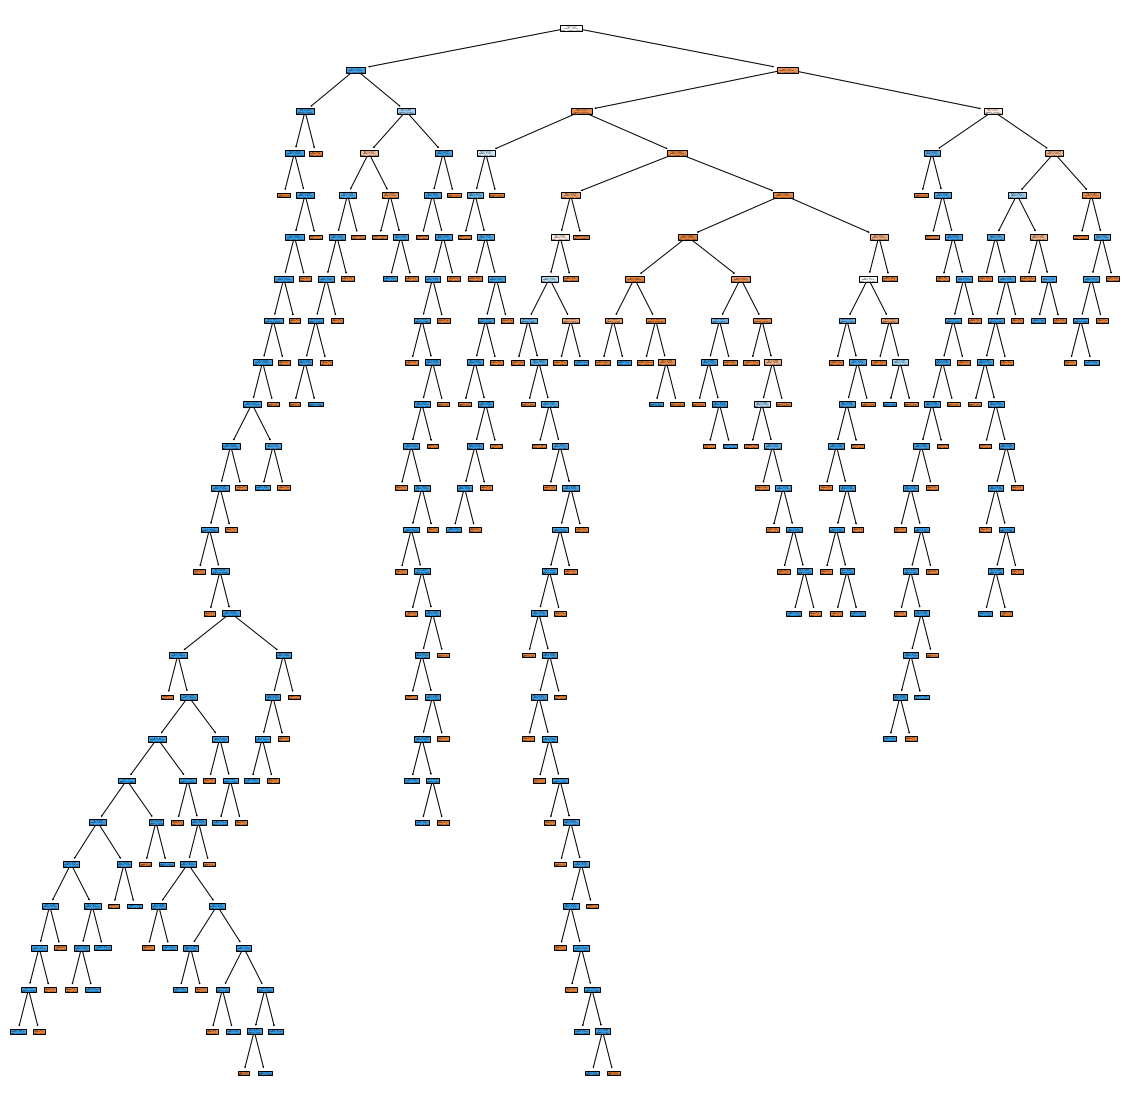

In [53]:
# create a tree
# create the tree

from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [54]:
# create object of   DecisionTreeClassifier class

dt1 = DecisionTreeClassifier(max_depth=5)    # note : max_depth can not more than 8

# by default use method : gini index

In [55]:
dt1 = create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     85308
           1       0.99      0.83      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusuion matrix
[[84721   587]
 [14446 70862]]


In [56]:
dt1.feature_importances_

array([1.19887529e-02, 0.00000000e+00, 1.34057490e-03, 0.00000000e+00,
       4.61861580e-02, 0.00000000e+00, 0.00000000e+00, 6.49814285e-03,
       0.00000000e+00, 9.18416602e-04, 3.56364034e-02, 1.98634048e-03,
       2.67730352e-02, 0.00000000e+00, 8.22478184e-01, 0.00000000e+00,
       1.56038528e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.93804148e-02, 0.00000000e+00, 0.00000000e+00, 5.51409676e-03,
       0.00000000e+00, 0.00000000e+00, 5.06329877e-03, 0.00000000e+00,
       4.21683256e-03, 1.18633104e-02])

In [57]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

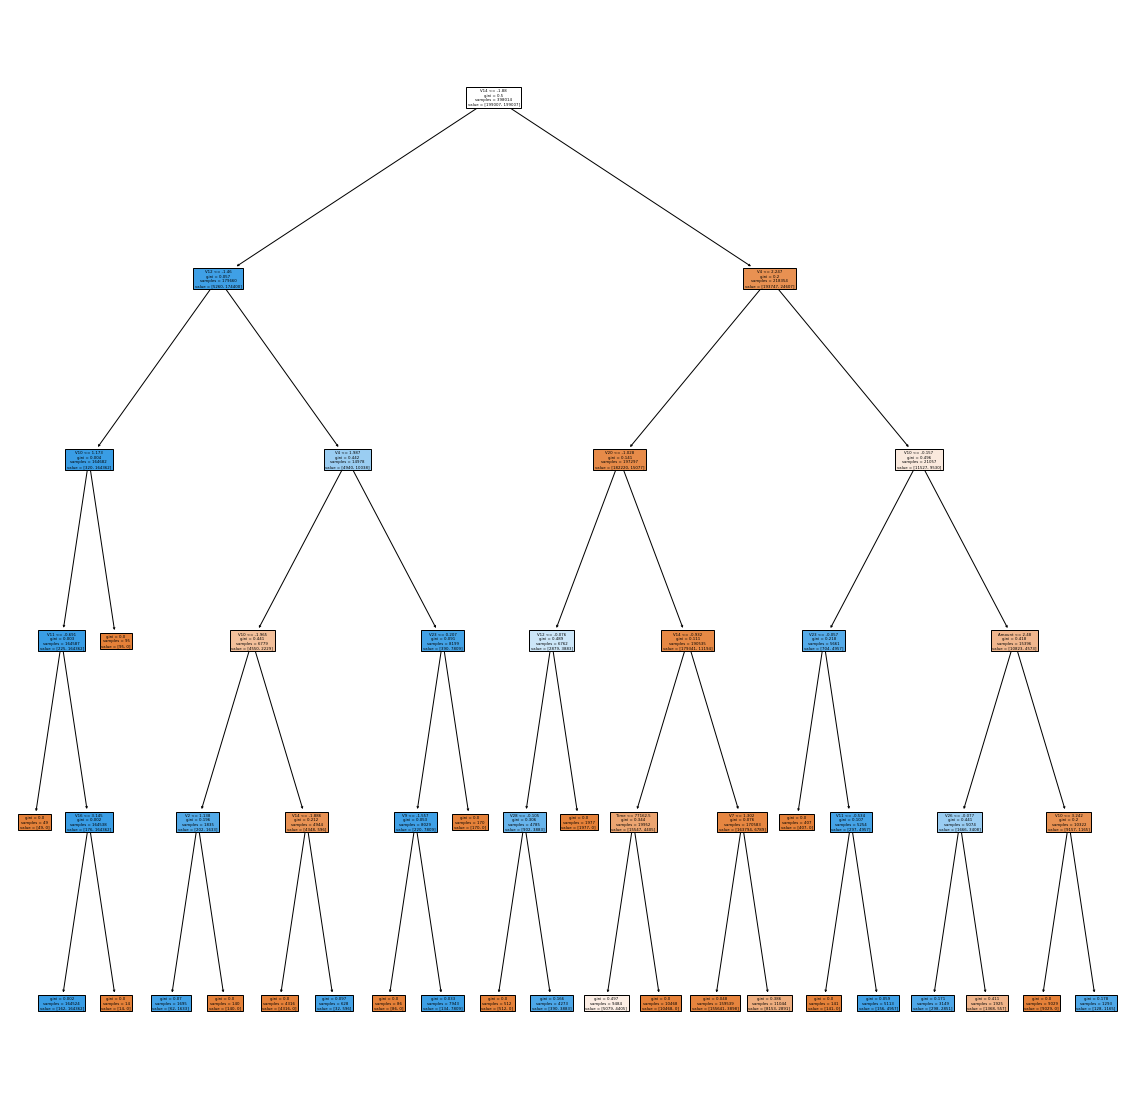

In [58]:
# create a tree
# create the tree

from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [59]:
# create object of DecisionTreeClassifier(min_samples_leaf=50) 

dt2=DecisionTreeClassifier(min_samples_leaf=50)            #by default Gini index method 

# min_samples_leaf =50 or more means not less than=50

In [60]:
# call function 
dt2 = create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85308
           1       1.00      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.91    170616
weighted avg       0.92      0.91      0.91    170616

Confusuion matrix
[[85079   229]
 [15105 70203]]


In [61]:
dt2.feature_importances_

array([1.24549360e-02, 2.54084657e-03, 1.90130931e-03, 5.79431218e-04,
       4.39957353e-02, 1.81007282e-02, 8.10422041e-03, 1.17468531e-02,
       1.18886400e-03, 5.41007923e-03, 3.98853951e-02, 2.07211284e-03,
       2.42856780e-02, 1.09776538e-02, 7.47949993e-01, 0.00000000e+00,
       4.92638780e-03, 1.09673372e-02, 0.00000000e+00, 1.08074437e-03,
       1.95619911e-02, 2.10164325e-03, 5.15556027e-03, 5.80290561e-03,
       1.18982132e-08, 0.00000000e+00, 4.60515149e-03, 3.29973168e-06,
       3.81213618e-03, 1.07889952e-02])

In [62]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

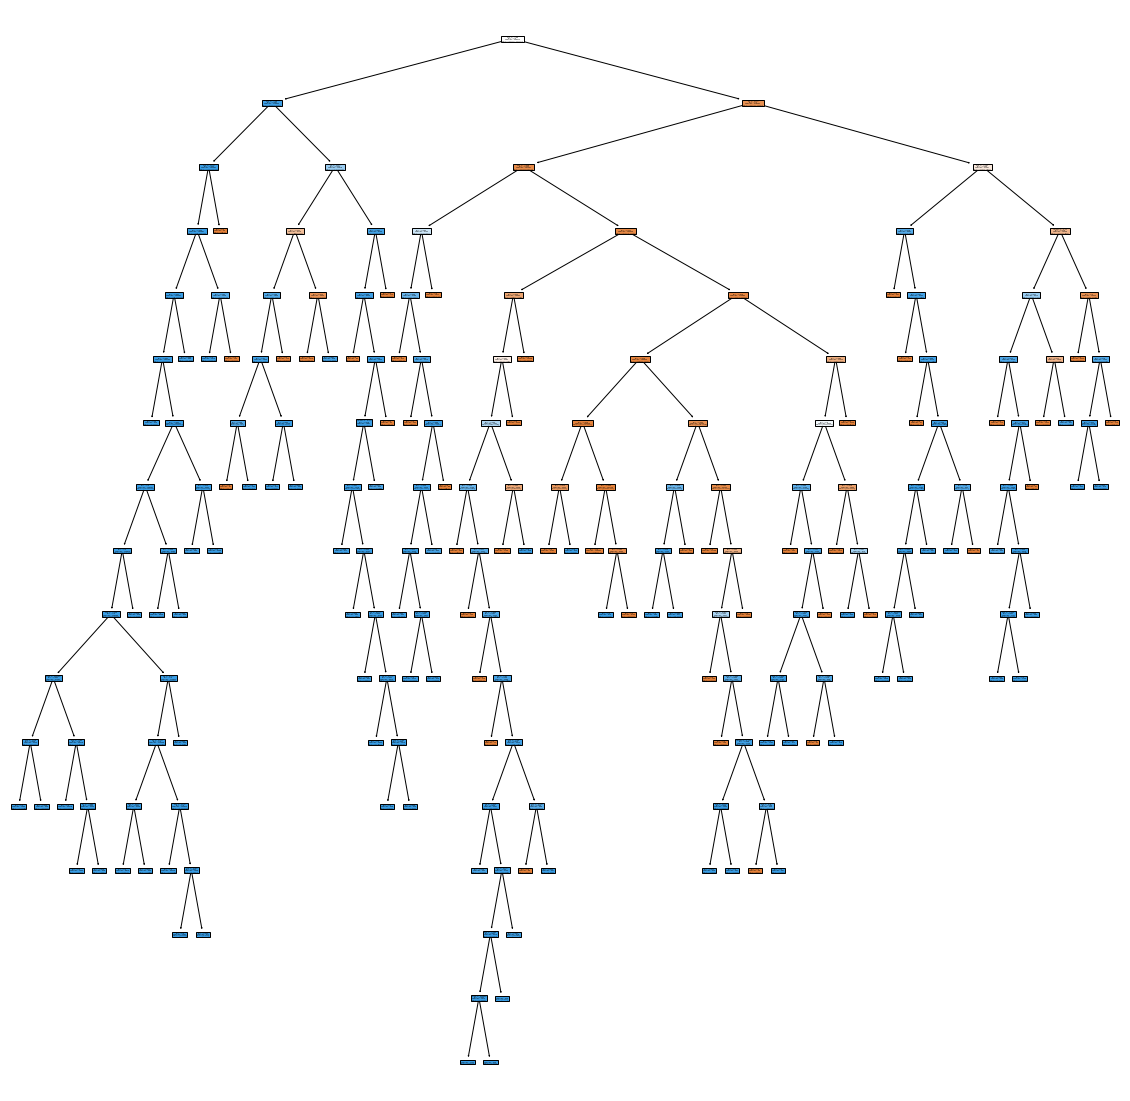

In [63]:
# create a tree

from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [64]:
#create object of DecisionTreeClassifier class

dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50)

In [65]:
dt3 = create_model(dt3)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

Confusuion matrix
[[85080   228]
 [16939 68369]]


In [66]:
dt3.feature_importances_

array([2.11141699e-03, 4.40508243e-03, 1.19462017e-02, 2.14177316e-03,
       7.03092612e-02, 8.47851186e-03, 7.96371878e-03, 5.60319159e-03,
       8.48851521e-03, 6.48787675e-03, 1.21489181e-02, 1.11242994e-02,
       2.78229569e-02, 1.64627066e-03, 6.91193121e-01, 3.23885990e-03,
       1.24368302e-02, 1.34682703e-03, 2.28526641e-03, 6.04091986e-03,
       2.17547063e-04, 3.50477154e-03, 2.17294177e-02, 0.00000000e+00,
       9.52574120e-03, 1.13603892e-04, 1.56817828e-02, 5.21058983e-03,
       1.01638912e-02, 3.66328352e-02])

In [67]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

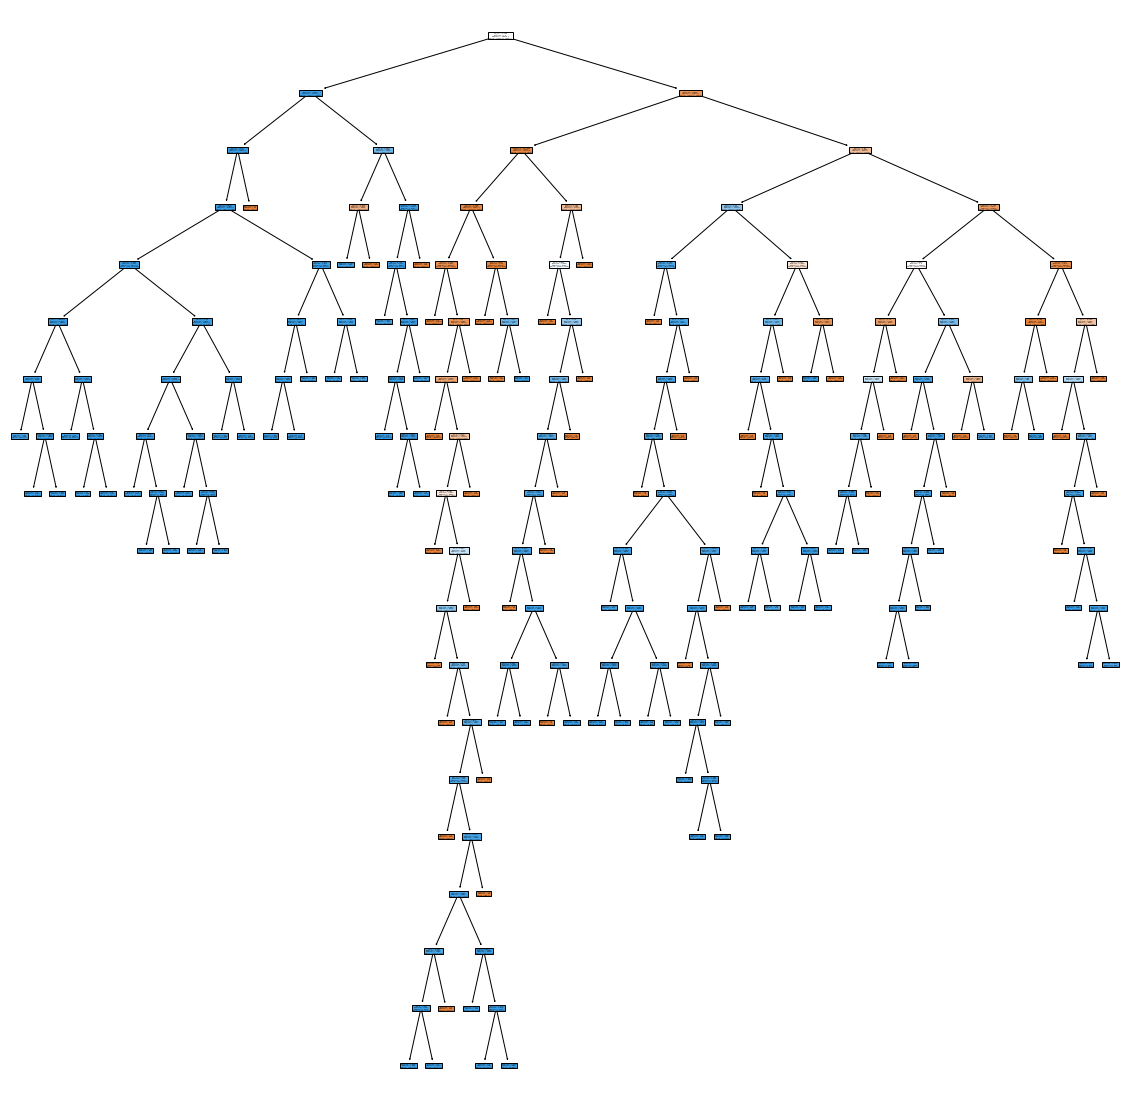

In [68]:
# create a tree

from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)


In [69]:
#RANDOM FOREST CLASSIFIER
#call random forest tree from package
from sklearn.ensemble import RandomForestClassifier

In [70]:
#Create user defined functuion
def create_model(model):
    model.fit(x_train1,y_train1) # train the model
    Y_pred=model.predict(x_test1)  #test the model
    print(classification_report(y_test1,y_pred))
    print(confusion_matrix(y_test1,y_pred))
    return model

In [71]:
#Create the object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [72]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[82833  2475]
 [ 9502 75806]]


In [73]:
#show important features
rfc.feature_importances_

array([0.00718789, 0.00811451, 0.04723067, 0.00806892, 0.04782535,
       0.0051368 , 0.00424844, 0.00558326, 0.00888744, 0.01149505,
       0.09372194, 0.14864173, 0.14218186, 0.0072173 , 0.3402256 ,
       0.00828216, 0.00801874, 0.0219694 , 0.00501359, 0.00524575,
       0.01056299, 0.00745113, 0.00455422, 0.00748098, 0.00234798,
       0.00277835, 0.00853458, 0.00386502, 0.00580912, 0.01231923])

In [74]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [75]:
#!pip install mlxtend

In [76]:
#STACKING----------
#StackingClssifier inbuilt class which defined in inbuilt package 
#mlxtend.classifier
#call StackingClassifier
from mlxtend.classifier import StackingClassifier

In [77]:
#Create object of Logistic Regfression , Decision Tree Entropy and Decision Tree Gini
lr=LogisticRegression()
dt1=DecisionTreeClassifier(criterion="entropy")
dt2=DecisionTreeClassifier()  #by default gini index

In [78]:
#Take :LogisticRegression algorithms for metacalssifier 
#Also create a object of LogisticRegression
meta=LogisticRegression()

In [79]:
model_list=[lr,dt1,dt2]  #create the model list

In [80]:
#Create the object of stackingclassifier class and passing the argument 
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [81]:
#call the function
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[82833  2475]
 [ 9502 75806]]


In [82]:
# 4. BOOSTING TECHNIQUE :
#1 . ADA Boost : Adaptor Boosting
#2 . Gradient Boost
#3. Extreme Gradient Boost

In [83]:
#1 . ADA Boost
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier inbuilt class for Ada Boost , call this class from sklearn ensemble package

In [84]:
#Create the object of AdaBoostClassifier class and  passing the no. of parameter 
#in this class
ada=AdaBoostClassifier(n_estimators=75) # n_estimators can be <=100
#AdaBoost create a decision stump means understood use model
#DecisionTreeClassifier

In [85]:
#call the function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[82833  2475]
 [ 9502 75806]]


In [86]:
#2 .Gradient Boosting
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling technique 
# GB  : - its create a fully grown tree.this algorithm is focus on short comings 
#short comings means error

In [87]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
#Create the object of GradientBosstingClassifier class
gbc=GradientBoostingClassifier(n_estimators=75)  #not <=100

In [89]:
#call functrion
gbc=create_model(gbc)


              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[82833  2475]
 [ 9502 75806]]


In [90]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [91]:
#install the external package from python's community first for XGBoost
#!pip install xgboost

In [92]:
from xgboost import XGBClassifier

In [93]:
#Create the object of class  XGBClassifier
xgc=XGBClassifier(n_estimators=100,reg_alpha=1)
#Automatically overfitting : reg means regualariization and alpha or lambda :
#pyperparameter

In [94]:
#cal the function
xgc=create_model(xgc)

[09:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[82833  2475]
 [ 9502 75806]]


In [95]:
##WE USE NAIVE BAYES----

In [96]:
#NAIVE BAYES----

In [97]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [98]:
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[82833  2475]
 [ 9502 75806]]


In [99]:
#----KNN------k neighbour calssifier
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knc=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knc.fit(x_train1,y_train1)

KNeighborsClassifier()

In [101]:
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     85308
           1       0.97      0.89      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[82833  2475]
 [ 9502 75806]]
